In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import seaborn as sns
df=sns.load_dataset('iris')

In [17]:
df['species']=df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [23]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
'''
criterion=to measure the qulaity of split. will take 'entropy' or 'gini' or “log_loss”
max depth=set the depth of the tree'''
classifer=DecisionTreeClassifier(criterion='entropy',max_depth=2)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# We are creating a overfitting decision tree since we have not selected any depth of tree
classifer.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

' Since we have less feature we are able to see decidion tree as below but if we have dataset with 400 fetaures it will be\n    difficult to see. so only go for "pre purning" not "post pruning" \n    for small dataset--post pruning\n    for large dataset--pre pruning\n    '

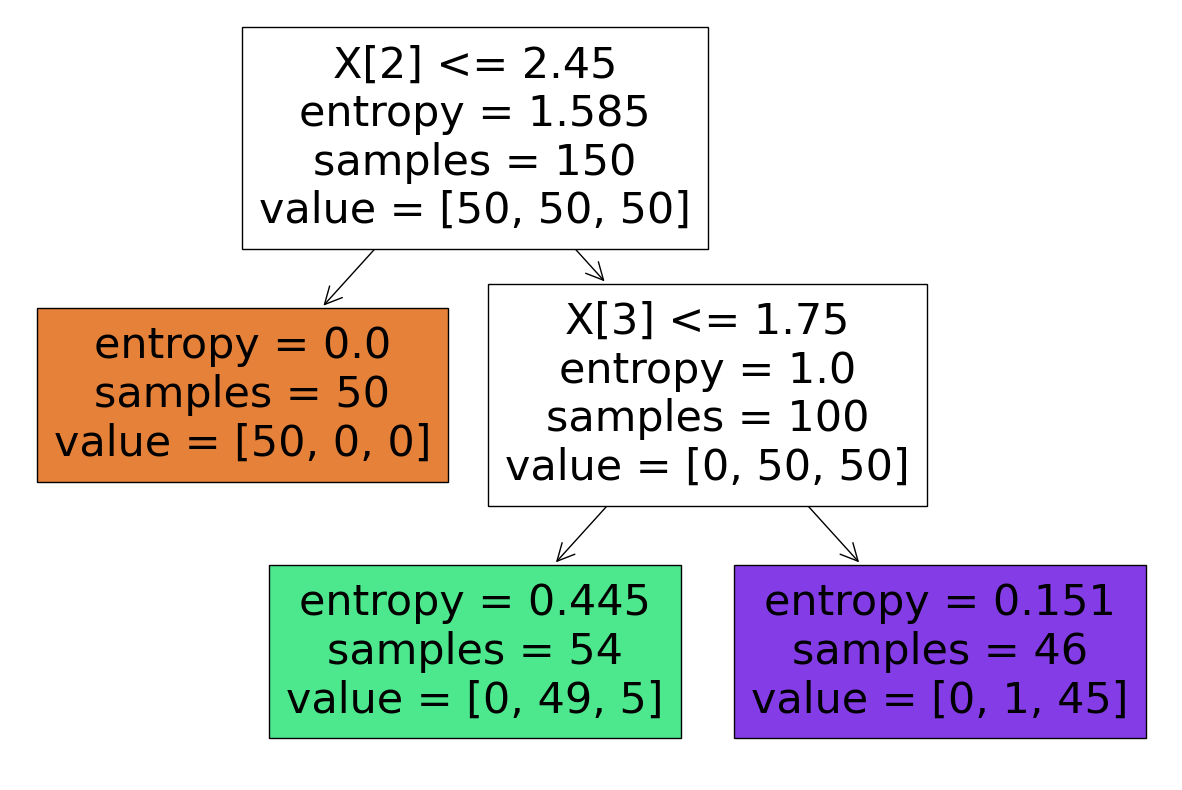

In [36]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(classifer,filled=True)
''' Since we have less feature we are able to see decidion tree as below but if we have dataset with 400 fetaures it will be
    difficult to see. so only go for "pre purning" not "post pruning" 
    for small dataset--post pruning
    for large dataset--pre pruning
    '''

In [45]:
'''using GridSearchCV to do pre pruning and set the max_depth value'''
from sklearn.model_selection import GridSearchCV
classifer=DecisionTreeClassifier()
parameters={'max_depth':[2,3,4]}
dt_classifer=GridSearchCV(classifer,parameters,cv=5)

In [56]:
dt_classifer.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4]})

In [59]:
print(dt_classifer.best_params_)
print(dt_classifer.best_score_)

{'max_depth': 4}
0.9666666666666668
